<a href="https://colab.research.google.com/github/GLITCHINvision/Amazon-clone/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Expand dims to add channel (since CNN expects 3D input)
X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]


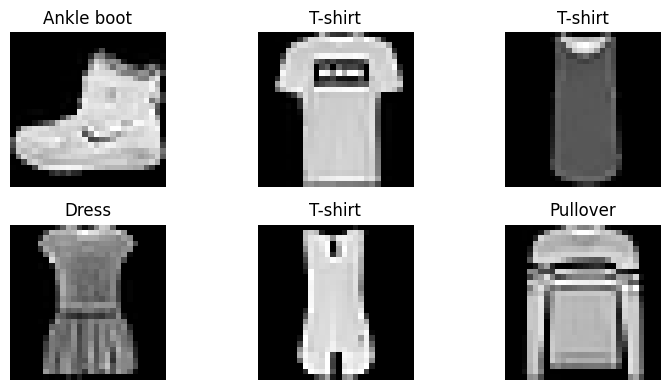

In [ ]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(8, 4))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(X_train[i].squeeze(), cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 30ms/step - accuracy: 0.7621 - loss: 0.6550 - val_accuracy: 0.8641 - val_loss: 0.3696
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.8822 - loss: 0.3288 - val_accuracy: 0.8854 - val_loss: 0.3167
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9005 - loss: 0.2746 - val_accuracy: 0.8953 - val_loss: 0.2840
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 28ms/step - accuracy: 0.9097 - loss: 0.2426 - val_accuracy: 0.9011 - val_loss: 0.2803
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9226 - loss: 0.2134 - val_accuracy: 0.9004 - val_loss: 0.2705


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8991 - loss: 0.2791
Test Accuracy: 90.04%


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


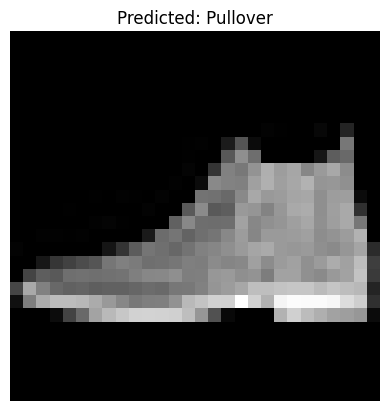

In [ ]:
predictions = model.predict(X_test)

# Show prediction for first image
plt.imshow(X_test[0].squeeze(), cmap='gray')
plt.title(f"Predicted: {class_names[predictions[1].argmax()]}")
plt.axis('off')
plt.show()
